In [1]:
import tweepy
from textblob import TextBlob


ModuleNotFoundError: No module named 'tweepy'

In [63]:
consumer_key='CbbklaZ4A7iOmpo9ZfsYFuWxU'
consumer_key_secret='RwR6OI6WVJag84B1NIk6OPCd2vv2EwFiBKpU7exePcPIDxWUZc'
access_token='1282233149594800128-kNp1ZvypJxDLjT4A0kOKW2QjZnnBMh'
access_token_secret='MjvpVkdhg5MdROIMFSBDsJt0dH6a0jQFHEFKFQp2LAArb'
auth=tweepy.OAuthHandler(consumer_key,consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)


public_tweets=api.search('COVID-19',lang="en",count=10000)
for tweet in public_tweets:
  
  print(tweet.created_at)
  print(tweet.text)
  analysis=TextBlob(tweet.text)
  print(analysis.sentiment)
  if analysis.sentiment[0]>0:
    print("Positive")
  elif analysis.sentiment[0]<0:
    print("Negative")
  else:
    print("Neutral")

2020-07-15 09:16:52
RT @MeghanaSastry: Men are fixing barricades and putting up a banner outside a new containment zone on Siddaiah road near Urvashi signal on…
Sentiment(polarity=0.07878787878787878, subjectivity=0.3015151515151515)
Positive
2020-07-15 09:16:52
RT @elementalauthor: Sex Experts Give Advice On Safe Social Interaction During The COVID-19 Pandemic https://t.co/fKPs6j2ZAK
Sentiment(polarity=0.26666666666666666, subjectivity=0.2833333333333333)
Positive
2020-07-15 09:16:52
Hairstylists with COVID-19 didn't infect any of their 139 clients. Face masks may be why. https://t.co/4HeQjRTyka
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
2020-07-15 09:16:52
RT @mitchellvii: If masks and social distancing work to prevent COVID-19, why do we need lockdowns? If your mask is protecting you, why do…
Sentiment(polarity=0.03333333333333333, subjectivity=0.06666666666666667)
Positive
2020-07-15 09:16:52
RT @mitchellvii: If masks and social distancing work to prevent COVID-19, why do we

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import re

plt.style.use('fivethirtyeight')
i=1
for tweet in public_tweets[0:5]:
  print(str(i)+') '+ tweet.text+'\n')
  i=i+1
df=pd.DataFrame([tweet.text for tweet in public_tweets],columns=['Tweets'])
df['Date']=pd.DataFrame([tweet.created_at for tweet in public_tweets],columns=['Date'])
df.head()

ModuleNotFoundError: No module named 'wordcloud'

In [123]:
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z]+', '',text)
  text=re.sub(r'#', '',text)
  text=re.sub(r'RT[\s]+', '',text)
  text=re.sub(r'https?:\/\/\S+', '',text)
  return text
df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets,Date,Subjectivity,Polarity,Analysis
0,: Men fixing barricades putting banner outside...,2020-07-15 09:16:52,0.301515,0.078788,Positive
1,: Sex Experts Give Advice Safe Social Interact...,2020-07-15 09:16:52,0.283333,0.266667,Positive
2,Hairstylists COVID-19 infect 139 clients. Face...,2020-07-15 09:16:52,0.000000,0.000000,Neutral
3,: masks social distancing work prevent COVID-1...,2020-07-15 09:16:52,0.066667,0.033333,Positive
4,: masks social distancing work prevent COVID-1...,2020-07-15 09:16:52,0.066667,0.033333,Positive
...,...,...,...,...,...
95,": COVID-19 you, still think it’s worth dine Ch...",2020-07-15 09:16:38,0.100000,0.300000,Positive
96,: DEC launching urgent appeal help people flee...,2020-07-15 09:16:38,0.000000,0.000000,Neutral
97,: Please watch this!!!! Especially you’ve test...,2020-07-15 09:16:38,0.772727,0.433488,Positive
98,: Korea's Ministry Health giving 45 billion wo...,2020-07-15 09:16:38,0.000000,0.000000,Neutral


In [124]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,Date,Subjectivity,Polarity,Analysis
0,: Men fixing barricades putting banner outside...,2020-07-15 09:16:52,0.301515,0.078788,Positive
1,: Sex Experts Give Advice Safe Social Interact...,2020-07-15 09:16:52,0.283333,0.266667,Positive
2,Hairstylists COVID-19 infect 139 clients. Face...,2020-07-15 09:16:52,0.000000,0.000000,Neutral
3,: masks social distancing work prevent COVID-1...,2020-07-15 09:16:52,0.066667,0.033333,Positive
4,: masks social distancing work prevent COVID-1...,2020-07-15 09:16:52,0.066667,0.033333,Positive
...,...,...,...,...,...
95,": COVID-19 you, still think it’s worth dine Ch...",2020-07-15 09:16:38,0.100000,0.300000,Positive
96,: DEC launching urgent appeal help people flee...,2020-07-15 09:16:38,0.000000,0.000000,Neutral
97,: Please watch this!!!! Especially you’ve test...,2020-07-15 09:16:38,0.772727,0.433488,Positive
98,: Korea's Ministry Health giving 45 billion wo...,2020-07-15 09:16:38,0.000000,0.000000,Neutral


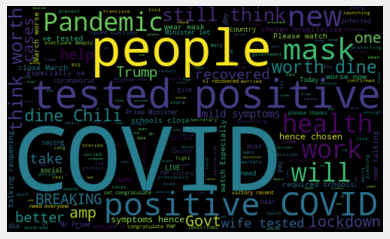

In [125]:
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [126]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Date,Subjectivity,Polarity,Analysis
0,: Men fixing barricades putting banner outside...,2020-07-15 09:16:52,0.301515,0.078788,Positive
1,: Sex Experts Give Advice Safe Social Interact...,2020-07-15 09:16:52,0.283333,0.266667,Positive
2,Hairstylists COVID-19 infect 139 clients. Face...,2020-07-15 09:16:52,0.000000,0.000000,Neutral
3,: masks social distancing work prevent COVID-1...,2020-07-15 09:16:52,0.066667,0.033333,Positive
4,: masks social distancing work prevent COVID-1...,2020-07-15 09:16:52,0.066667,0.033333,Positive
...,...,...,...,...,...
95,": COVID-19 you, still think it’s worth dine Ch...",2020-07-15 09:16:38,0.100000,0.300000,Positive
96,: DEC launching urgent appeal help people flee...,2020-07-15 09:16:38,0.000000,0.000000,Neutral
97,: Please watch this!!!! Especially you’ve test...,2020-07-15 09:16:38,0.772727,0.433488,Positive
98,: Korea's Ministry Health giving 45 billion wo...,2020-07-15 09:16:38,0.000000,0.000000,Neutral


In [127]:
#print all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) : Men fixing barricades putting banner outside new containment zone Siddaiah road near Urvashi signal on…

2) : Sex Experts Give Advice Safe Social Interaction COVID-19 Pandemic

3) : masks social distancing work prevent COVID-19, need lockdowns? mask protecting you, do…

4) : masks social distancing work prevent COVID-19, need lockdowns? mask protecting you, do…

5) : RelianceAGMs2020 LIVE | Target capital raise now complete RILAGM RelianceIndustries MarketsWIthBS

6) : wife tested positive COVID-19 mild symptoms hence chosen hospitalise…

7) CroozefmNews COVID19UG 3 new COVID-19 cases confirmed. cumulative confirmed cases Ugandans to-date 1,0…

8) : Maldivian young man Ibrahim Salym helps employer Chinese company resume work COVID-19 lockdown, accelerate the…

9) _reilly: Breaking recent Covid_19 outbreak amongst group young visitors holiday homes Killarney contracted…

10) : Live around Glasgow? Today launching 'Stories Streets' initiative part resea…

11) : continue absolute foc

In [128]:
#print all the negative values
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) : COVID-19 required schools close March it’s worse now, talking reopening?

2) : ⁦⁩ 👀👀👀👀👀👀👀👀HAHA. WRONG. HCQ Helps Contain COVID-19 Cases: New Evidence Major Retract…

3) _patt: family 9 gathers home pay tribute late grandfather, least one person COVID-19 positive. Since…

4) : COVID-19 required schools close March it’s worse now, talking reopening?

5) alter results. Go America hid behind Trump. covid-19 real. hope ha…

6) : “Melbourne BLM protest cluster worse feared”. asking dept “When two previously unpublicised posi…

7) Indeed quite disappointing stance . Teachers saying want stay h…

8) _2019: Healthcare one impacted sectors COVID19. rapid evolution e-health set long term expect…

9) : COVID-19 required schools close March it’s worse now, talking reopening?

10) rough serious work 2 weeks month promised uif covid 19 ters still waiting

11) : COVID-19 required schools close March it’s worse now, talking reopening?

12) 😷They bemoaned lost resources already expended albeit wron

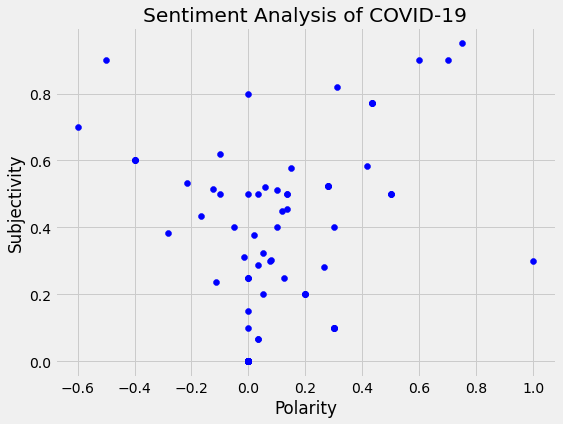

In [129]:
#Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis of COVID-19')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [130]:
#percentage of positive comments
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

46.0

In [131]:
#percentage of negative comments
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1)

15.0

In [132]:
#percentage of neutral comments
neutweets=df[df.Analysis=='Neutral']
neutweets=neutweets['Tweets']
round((neutweets.shape[0]/df.shape[0])*100,1)

39.0

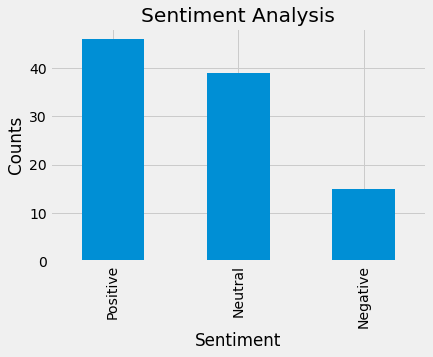

In [133]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'No. of Tweets per Hour')

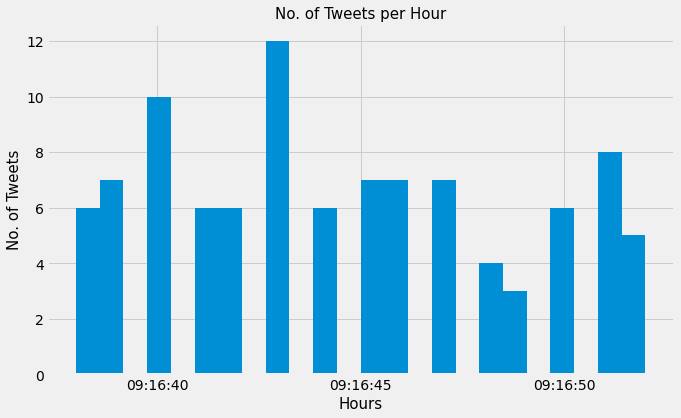

In [78]:
plt.figure(1, figsize=(10,6))
plt.hist(df["Date"],bins = 24);
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)

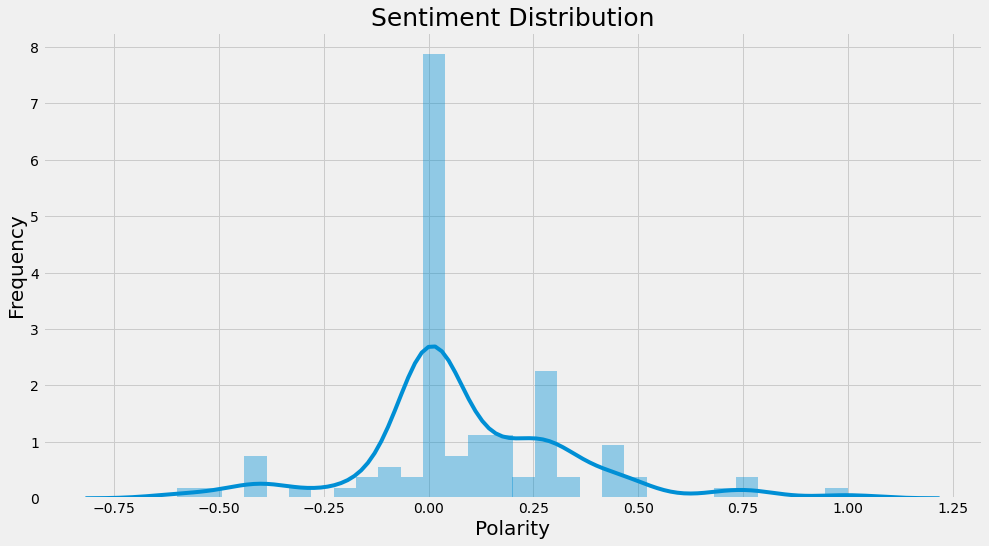

In [79]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(df['Polarity'], bins=30)
plt.title('Sentiment Distribution',size = 25)
plt.xlabel('Polarity',size = 20)
plt.ylabel('Frequency',size = 20)
plt.show();

In [89]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [114]:
#Removing Stop Words
df['Tweets'] = df['Tweets'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word.lower() not in stopwords]))
df['Tweets']

0     : Men fixing barricades putting banner outside...
1     : Sex Experts Give Advice Safe Social Interact...
2     Hairstylists COVID-19 infect 139 clients. Face...
3     : masks social distancing work prevent COVID-1...
4     : masks social distancing work prevent COVID-1...
                            ...                        
95    : COVID-19 you, still think it’s worth dine Ch...
96    : DEC launching urgent appeal help people flee...
97    : Please watch this!!!! Especially you’ve test...
98    : Korea's Ministry Health giving 45 billion wo...
99    : wear mask store protect people COVID-19, bet...
Name: Tweets, Length: 100, dtype: object

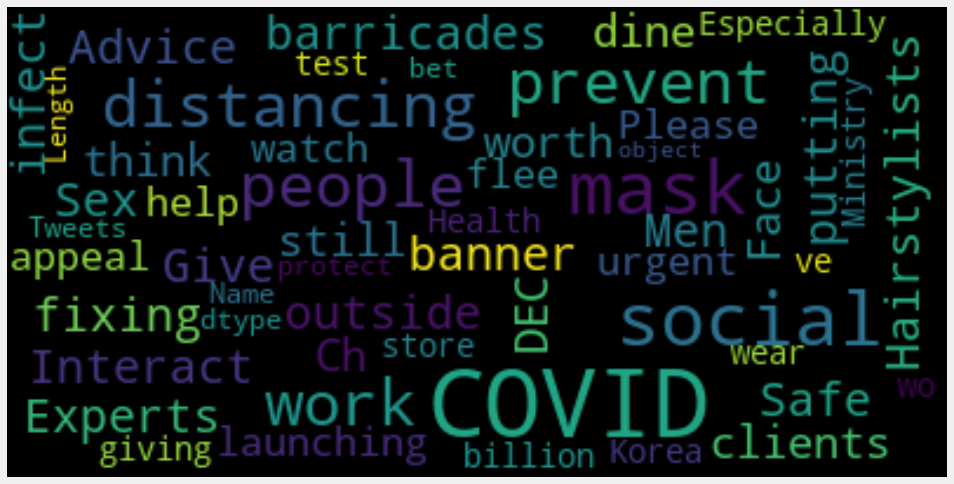

In [115]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['Tweets'])

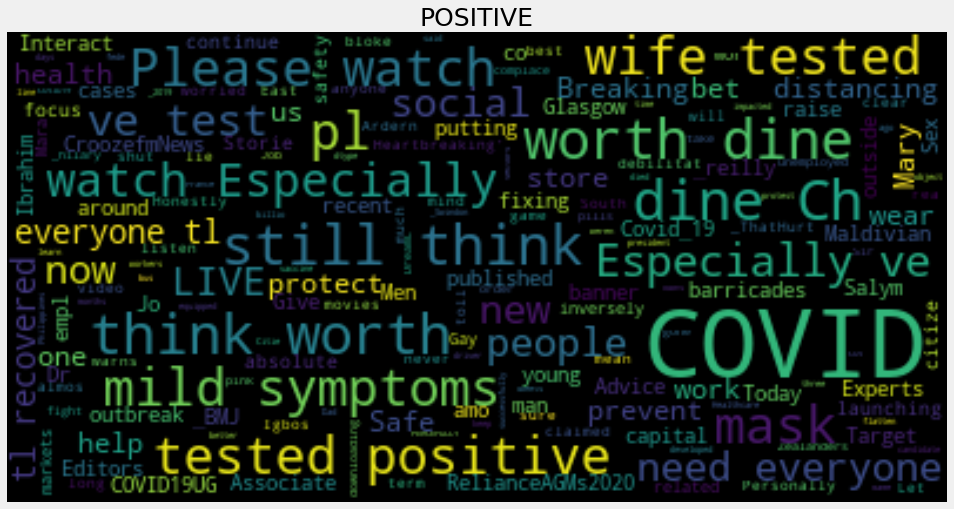

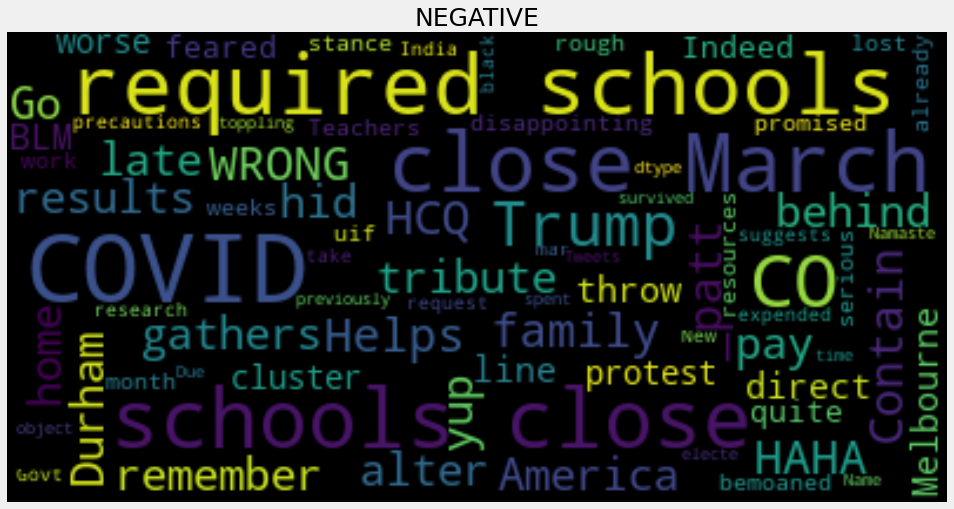

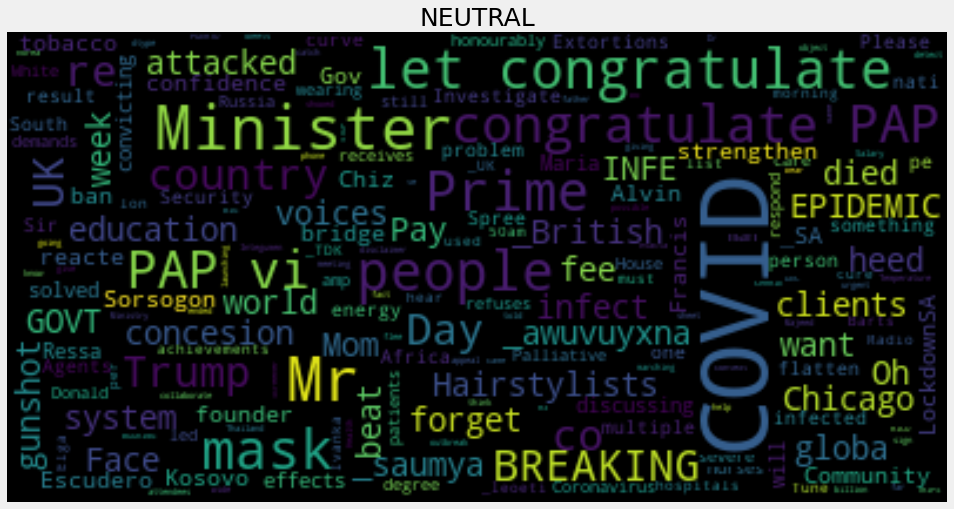

In [116]:
pos = df['Tweets'][df['Analysis'] == 'Positive']
show_wordcloud(pos , 'POSITIVE')

neg = df['Tweets'][df['Analysis'] == 'Negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = df['Tweets'][df['Analysis'] == 'Neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [121]:
import collections
from collections import Counter
df['Tweets'] = df['Tweets'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word.lower() not in stopwords]))

words = []
words = [word for i in df.Tweets for word in i.split()]

In [111]:
df['Tweets'].head()

0    : Men fixing barricades putting banner outside...
1    : Sex Experts Give Advice Safe Social Interact...
2    Hairstylists COVID-19 infect 139 clients. Face...
3    : masks social distancing work prevent COVID-1...
4    : masks social distancing work prevent COVID-1...
Name: Tweets, dtype: object

In [122]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,:,63
1,COVID-19,34
2,19,13
3,Covid-19,9
4,it’s,9


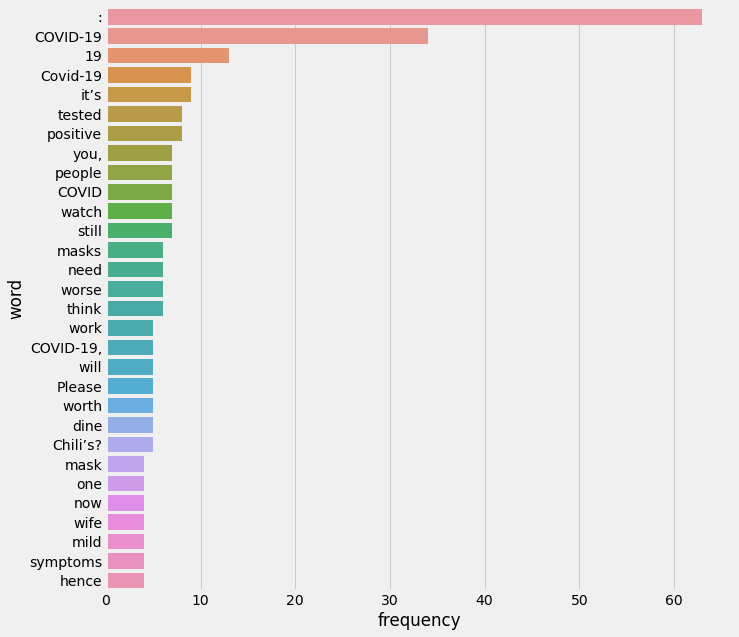

In [119]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [151]:
# Bokeh Libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show


In [147]:

# create figure 
p = figure(plot_width = 1000, plot_height = 400) 
   
# add a line renderer 
p.hexbin(df['Polarity'],df['Subjectivity'], line_width = 5, color = "green",size=0.5, hover_color="pink", hover_alpha=0.8) 
  
# Show the plot
show(p)


In [150]:
#create figure
p = figure(plot_width=1000, plot_height=400,x_axis_label='Date',title='Sentiment Analysis')

# add a circle renderer with a size, color, and alpha
p.circle(df['Date'], df['Polarity'], size=20, color="navy", alpha=0.5)
p.circle(df['Date'],df['Subjectivity'],size=20, color="orange", alpha=0.5)

# show the results
show(p)